# Evaluate simulation using zstar

In [1]:
# Jupyter Notebook with widget matplotlib plots
%matplotlib notebook
# Jupyter Lab with widget matplotlib plots
#%matplotlib widget 
# with Jupyter and Jupyter Lab but without widget matplotlib plots
# %matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import sys
import pyicon as pyic
import cartopy
import seawater as sw

calc
tb
xarray
done xarray
IconData
plotting
view
calc
tb
IconData
plotting
view
quickplots
quickplots


In [3]:
ccrs_proj = cartopy.crs.PlateCarree()

## Specify data set

Reference data set:

In [14]:
run = 'spinup_R2B6Ln64zstar'
runname = ''
gname = 'r2b6_oce_r0004'
lev = 'L64'

path_data     = f'/work/bu1213/m300466/icon-ruby/zstar2-ruby_thin/experiments/{run}/' 
path_grid     = f'/mnt/lustre01/work/mh0033/m300602/icon/grids/{gname}/'
path_ckdtree  = f'{path_grid}ckdtree/'
fpath_ckdtree = f'{path_grid}ckdtree/rectgrids/{gname}_res0.30_180W-180E_90S-90N.npz'
fpath_fx      = f'{path_grid}{gname}_{lev}_fx.nc'

In [15]:
IcD1 = pyic.IconData(
    fname        = run+'_????????????????.nc',
    path_data    = path_data,
    path_grid    = path_grid,
    gname        = gname,
    lev          = lev,
    do_triangulation    = False,
    omit_last_file      = False,
    calc_coeff          = False,
    calc_coeff_mappings = False,
              )

Comparison data set:

In [18]:
run = 'spinup_R2B6Ln64zlevel'
runname = ''
gname = 'r2b6_oce_r0004'
lev = 'L64'

path_data     = f'/work/bu1213/m300466/icon-ruby/zstar2-ruby_thin/experiments/{run}/' 
path_grid     = f'/mnt/lustre01/work/mh0033/m300602/icon/grids/{gname}/'
path_ckdtree  = f'{path_grid}ckdtree/'
fpath_ckdtree = f'{path_grid}ckdtree/rectgrids/{gname}_res1.00_180W-180E_90S-90N.npz'
fpath_fx      = f'{path_grid}{gname}_{lev}_fx.nc'

In [19]:
IcD2 = pyic.IconData(
    fname        = run+'_????????????????.nc',
    path_data    = path_data,
    path_grid    = path_grid,
    gname        = gname,
    lev          = lev,
    do_triangulation    = False,
    omit_last_file      = False,
    calc_coeff          = False,
    calc_coeff_mappings = False,
              )

## Specify time and region

In [20]:
IcD = IcD1

t1 = '1940-02-01'
t2 = '1941-01-01'

ic1 = np.argmin((IcD.clon+30)**2+(IcD.clat-26)**2)
ic2 = np.argmin((IcD.clon+50)**2+(IcD.clat-45)**2)
iz = np.argmin((IcD.depthc-0)**2)

In [21]:
iz20, iz50, iz100, iz200 = pyic.indfind([20,50,100,200], IcD.depthc)

## Load data

In [22]:
so1, it_ave   = pyic.time_average(IcD1, 'so', t1=t1, t2=t2, iz='all')
so2, it_ave   = pyic.time_average(IcD2, 'so', t1=t1, t2=t2, iz='all')
so1[so1==0.] = np.ma.masked
so2[so2==0.] = np.ma.masked

In [23]:
lon, lat, so1i = pyic.interp_to_rectgrid(so1, fpath_ckdtree)
lon, lat, so2i = pyic.interp_to_rectgrid(so2, fpath_ckdtree)

In [25]:
zos1, it_ave   = pyic.time_average(IcD1, 'zos', t1=t1, t2=t2, iz='all')
zos2, it_ave   = pyic.time_average(IcD2, 'zos', t1=t1, t2=t2, iz='all')

In [26]:
lon, lat, zos1i = pyic.interp_to_rectgrid(zos1, fpath_ckdtree)
lon, lat, zos2i = pyic.interp_to_rectgrid(zos2, fpath_ckdtree)

## Derive new vertical coordinate

The new vertical coordinate is given by:
$$
z^* = H \frac{z-\eta}{H+\eta}
$$

From this, we can derive the new layer thickness as:
$$
\Delta z^* = \frac{H}{H+\eta} \Delta z
$$

In [37]:
IcD = IcD1
zos = zos1
so = so1

### Checking topography

In [38]:
# bottom index
kbot = IcD.wet_c.sum(axis=0).astype(int)-1
iall = np.arange(IcD.clon.size, dtype=int)

In [39]:
topo = IcD.depthc[kbot] * IcD.wet_c[0,:]

In [40]:
lon, lat, topoi = pyic.interp_to_rectgrid(topo, fpath_ckdtree)

<IPython.core.display.Javascript object>


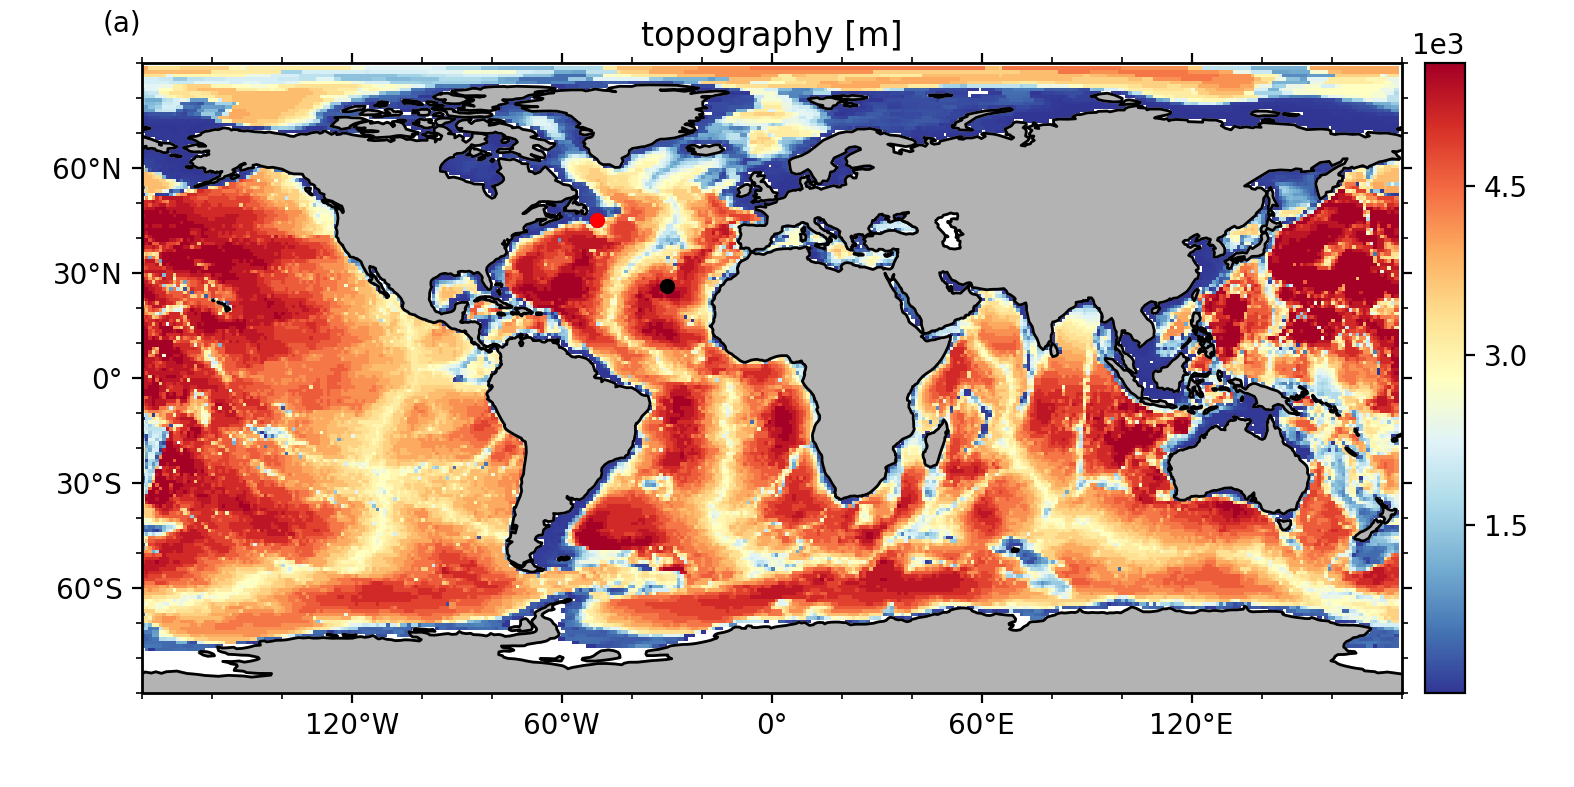

In [41]:
hca, hcb = pyic.arrange_axes(1,1, plot_cb=True, asp=0.5, fig_size_fac=2.,
                           sharex=True, sharey=True,
                           xlabel="", ylabel="",
                           projection=ccrs_proj,
                          )
ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
hm = pyic.shade(lon, lat, topoi, ax=ax, cax=cax, clim='auto',
              transform=ccrs_proj)
ax.set_title(f'topography [m]')

for ax in hca:
    pyic.plot_settings(ax, template='global')
    ax.scatter(IcD.clon[ic1], IcD.clat[ic1], c='k', s=20)
    ax.scatter(IcD.clon[ic2], IcD.clat[ic2], c='r', s=20)

### Plotting scale factor stretch_c $s_c = \frac{H+\eta}{H}$

In [85]:
stretch_c = (topo+zos) / topo

In [86]:
lon, lat, stretch_ci = pyic.interp_to_rectgrid(stretch_c, fpath_ckdtree)

<IPython.core.display.Javascript object>


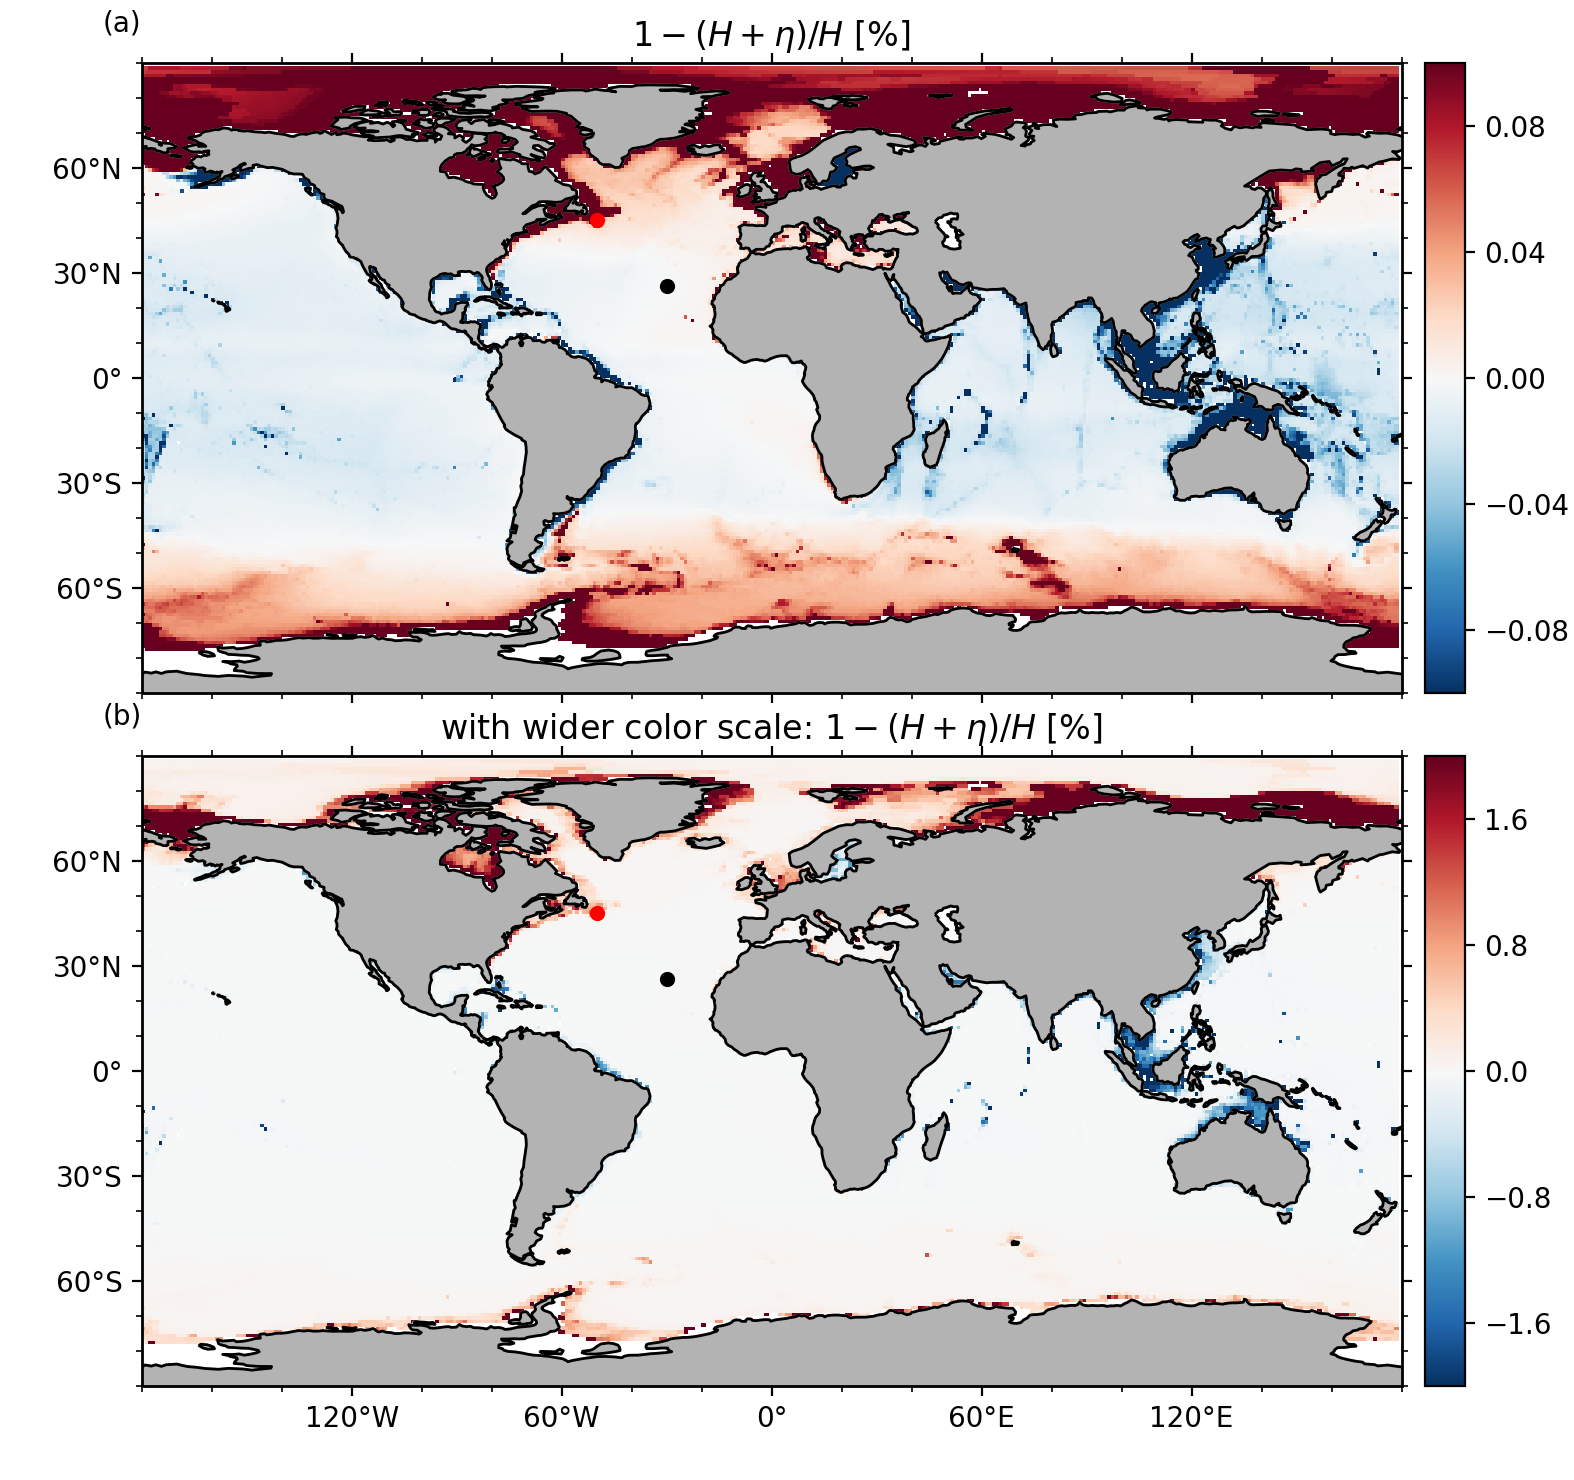

In [87]:
hca, hcb = pyic.arrange_axes(1,2, plot_cb=True, asp=0.5, fig_size_fac=2.,
                           sharex=True, sharey=True,
                           xlabel="", ylabel="",
                           projection=ccrs_proj,
                          )
ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
hm = pyic.shade(lon, lat, (1-stretch_ci)*100, ax=ax, cax=cax, clim=0.1,
              transform=ccrs_proj)
ax.set_title(f'$1-(H+\eta)/H$ [%]')

ii+=1; ax=hca[ii]; cax=hcb[ii]
hm = pyic.shade(lon, lat, (1-stretch_ci)*100, ax=ax, cax=cax, clim=2.,
              transform=ccrs_proj)
ax.set_title(f'with wider color scale: $1-(H+\eta)/H$ [%]')

for ax in hca:
    pyic.plot_settings(ax, template='global')
    ax.scatter(IcD.clon[ic1], IcD.clat[ic1], c='k', s=20)
    ax.scatter(IcD.clon[ic2], IcD.clat[ic2], c='r', s=20)

### Comparing layer thickness

From Adcroft we have:
$$
z^* = \frac{H}{H+\eta} (z-\eta)
$$
Here $z^*$ is the distance to the surface of the water (not to the reference geoid). Special values are:

Solving for $z$ we obtain:
$$
z = \frac{H+\eta}{H} z^* + \eta
$$
In particular note that: $z(z^*=0) = \eta$ and $z(z^*=-H) = - H$.

The model variables are written out on the $z^*$ levels. To get their depth in a fixed reference frame, the above equation can be used.

We transform furthermore from $z$ to depth $d = -z$:
$$
d = \frac{H+\eta}{H} d^* - \eta
$$

For the level distances we get:
$$
\Delta z = \frac{H+\eta}{H} \Delta z^*
$$
Note that $\Delta z^*$ is what is added in the namelist as level spacing.

Check for consistency (ackowleding that $\sum \Delta z^* = -H$):
$$
\sum \Delta z = \frac{H+\eta}{H} \sum \Delta z^* = - (H+\eta)
$$

# Vikram, please check

Special treatment of ice:

For normal z-level, we need to make the following adjustment:
$$
d = \frac{H+\eta}{H} d^* - \eta' = \frac{H+\eta}{H} d^* - (\eta+D)
$$
where $D$ is ```draft_ave```.

In [104]:
depthi_star = stretch_c[np.newaxis,:] * IcD.depthi[:,np.newaxis] - zos1[np.newaxis,:]
depthc_star = 0.5*(depthi_star[1:,:]+depthi_star[:-1,:])

zc_star = -1*depthc_star
zc_levl = -1*IcD.depthc
zi_star = -1*depthi_star   # not used
zi_levl = -1*IcD.depthi    # not used

Check calculation if $\eta>0$ it should be that $d^*<d$:

In [105]:
for ic in [ic1, ic2]:
    print(f'inteface:   eta = {zos[ic]:+.4f}, d^* = {depthi_star[0,ic]:+.4f}, d = {IcD.depthi[0]:+.4f}')
    print(f'half level: eta = {zos[ic]:+.4f}, d^* = {depthc_star[0,ic]:+.4f}, d = {IcD.depthc[0]:+.4f}')

inteface:   eta = +0.0147, d^* = -0.0147, d = +0.0000
half level: eta = +0.0147, d^* = +5.9853, d = +6.0000
inteface:   eta = -0.6692, d^* = +0.6692, d = +0.0000
half level: eta = -0.6692, d^* = +6.6093, d = +6.0000


<IPython.core.display.Javascript object>


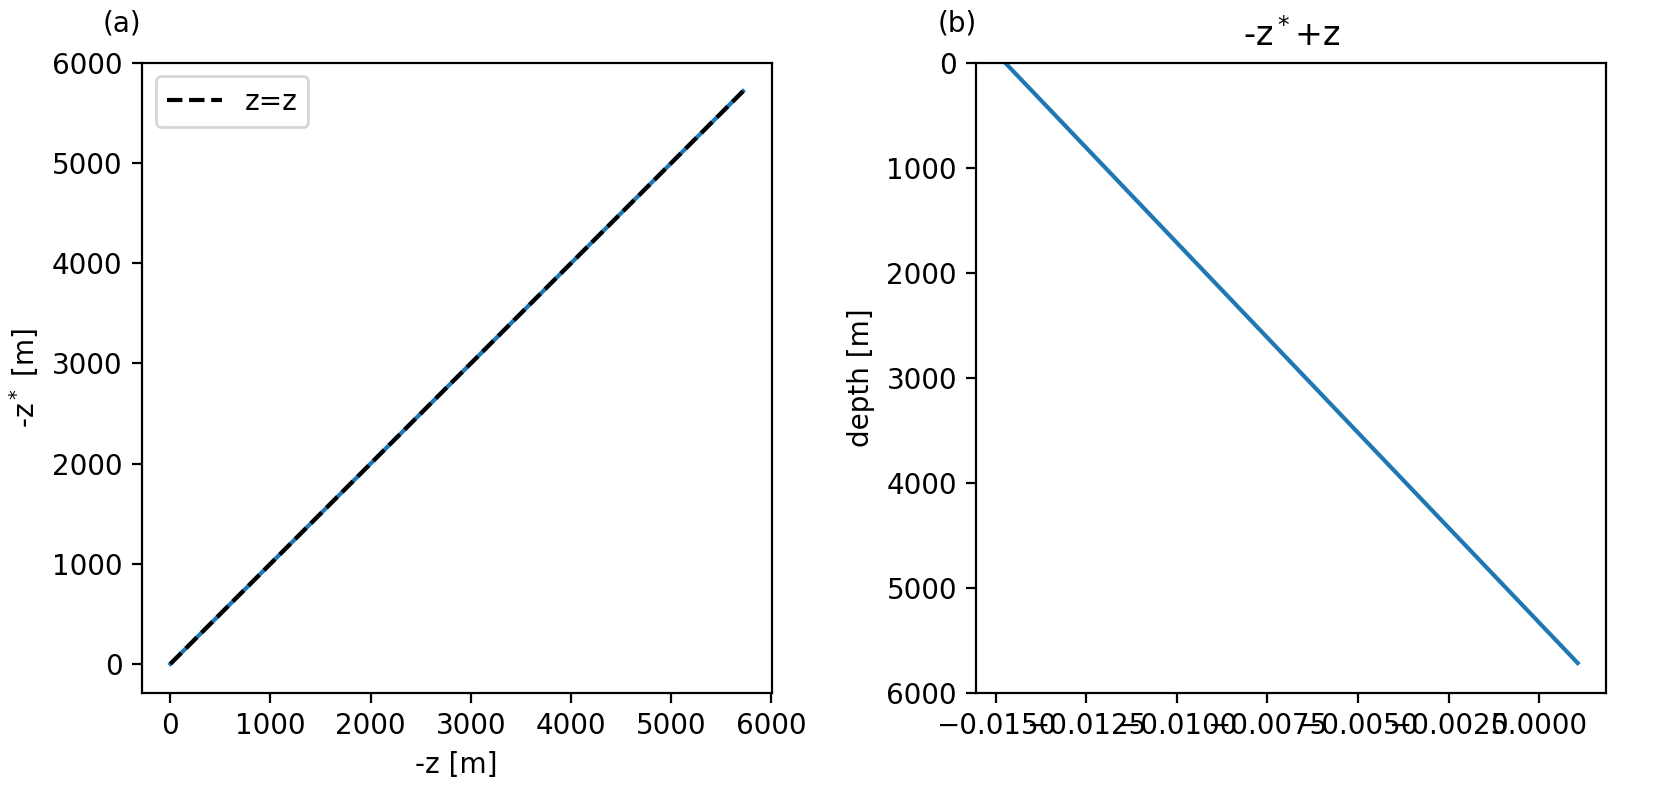

(6000.0, 0.0)

In [96]:
hca, hcb = pyic.arrange_axes(2,1, plot_cb=False, asp=1, fig_size_fac=2.,
                           sharex=False, sharey=False,
                           xlabel="", ylabel="",
                            )
ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
ax.plot(IcD.depthi, depthi_star[:,ic1])
ax.plot(IcD.depthi, IcD.depthi, linestyle='--', color='k', label='z=z')
ax.set_xlabel('-z [m]')
ax.set_ylabel('-z$^*$ [m]')
ax.legend()

ii+=1; ax=hca[ii]; cax=hcb[ii]
ax.plot(depthi_star[:,ic1]-IcD.depthi, IcD.depthi)
ax.set_ylabel('depth [m]')
ax.set_title('-z$^*$+z')
ax.set_ylim(6000,0)

In [36]:
dzstar = depth_star[1:]-depth_star[:-1]
dzstar = np.ma.array(dzstar, mask=IcD.wet_c==0.)

In [24]:
# dzstar[:,ic]

In [25]:
dzw = np.ma.array(IcD.dzw, mask=IcD.wet_c==0.)
# # ratio between old and new layer thickness
# dz_dzstar = dzw/dzstar
# # maximum difference in each water column
# dz_dzstar_max = dz_dzstar.max(axis=0)
# kmax = np.argmax(dz_dzstar, axis=0)
# # maximum depth at which maximum difference occurs
# depth_max_diff = IcD.depthc[kmax]
# # interpolate to regular grid
# lon, lat, dz_dzstar_maxi = pyic.interp_to_rectgrid(dz_dzstar_max, fpath_ckdtree)
# lon, lat, depth_max_diffi = pyic.interp_to_rectgrid(depth_max_diff, fpath_ckdtree)
# lon, lat, zstar_faci = pyic.interp_to_rectgrid(zstar_fac, fpath_ckdtree)

In [26]:
#(dz_dzstar[:,ic]).min(), (dz_dzstar[:,ic]).max()

<IPython.core.display.Javascript object>


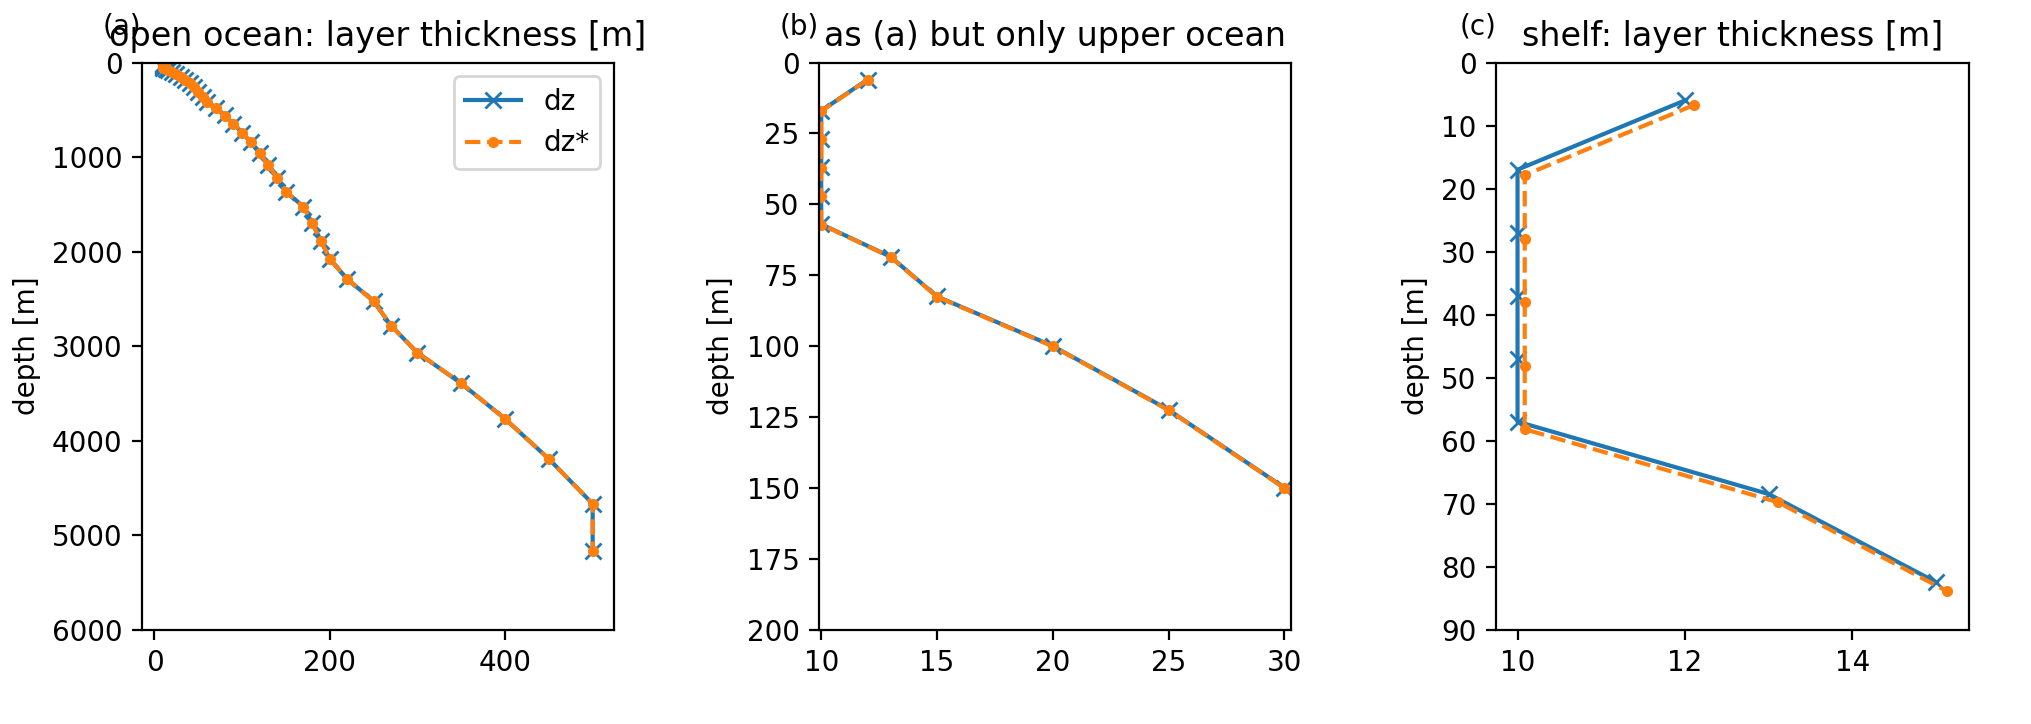

In [27]:
hca, hcb = pyic.arrange_axes(3,1, plot_cb=False, asp=1.2, fig_size_fac=1.8,
                           sharex=False, sharey=False,
                           xlabel="", ylabel="depth [m]",
                          )
ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
ax.plot(dzw[:,ic1], IcD.depthc, marker='x', label='dz')
ax.plot(dzstar[:,ic1], depth_starc[:,ic1], marker='.', linestyle='--', label='dz*')
ax.set_title('open ocean: layer thickness [m]')
ax.legend()

ii+=1; ax=hca[ii]; cax=hcb[ii]
ax.plot(dzw[:,ic1], IcD.depthc, marker='x')
ax.plot(dzstar[:,ic1], depth_starc[:,ic1], marker='.', linestyle='--')
ax.set_title('as (a) but only upper ocean')

ii+=1; ax=hca[ii]; cax=hcb[ii]
ax.plot(dzw[:,ic2], IcD.depthc, marker='x', label='dz')
ax.plot(dzstar[:,ic2], depth_starc[:,ic2], marker='.', linestyle='--', label='dz*')
ax.set_title('shelf: layer thickness [m]')

for nn, ax in enumerate(hca):
    ax.ticklabel_format(useOffset=False)
    if nn==0:
        ax.set_ylim(6000,0)
    elif nn==1:
        ax.set_ylim(200,0)
        ax.set_xlim(dzw[:iz200,ic1].min()*0.99,dzw[:iz200,ic1].max()*1.01)
    else:
        ax.set_ylim(90,0)

### Remapping from z$^*$ to z

In [97]:
ind_pos = zos>0.
ind_neg = zos<0.

In [98]:
sorm = np.ma.zeros((IcD.nz, IcD.clon.size))
sorm[:-1,ind_pos] =  (
    (so[1:,ind_pos]-so[:-1,ind_pos])/(zc_star[1:,ind_pos]-zc_star[:-1,ind_pos]) 
    * (zc_levl[:-1,np.newaxis]-zc_star[:-1,ind_pos]) 
    + so[:-1,ind_pos]
)
sorm[-1,ind_pos] = so[-1,ind_pos]
sorm[1:,ind_neg] =  (
    (so[1:,ind_neg]-so[:-1,ind_neg])/(zc_star[1:,ind_neg]-zc_star[:-1,ind_neg]) 
    * (zc_levl[1:,np.newaxis]-zc_star[:-1,ind_neg]) 
    + so[:-1,ind_neg]
)
sorm[0,ind_neg] = so[0,ind_neg]

<IPython.core.display.Javascript object>


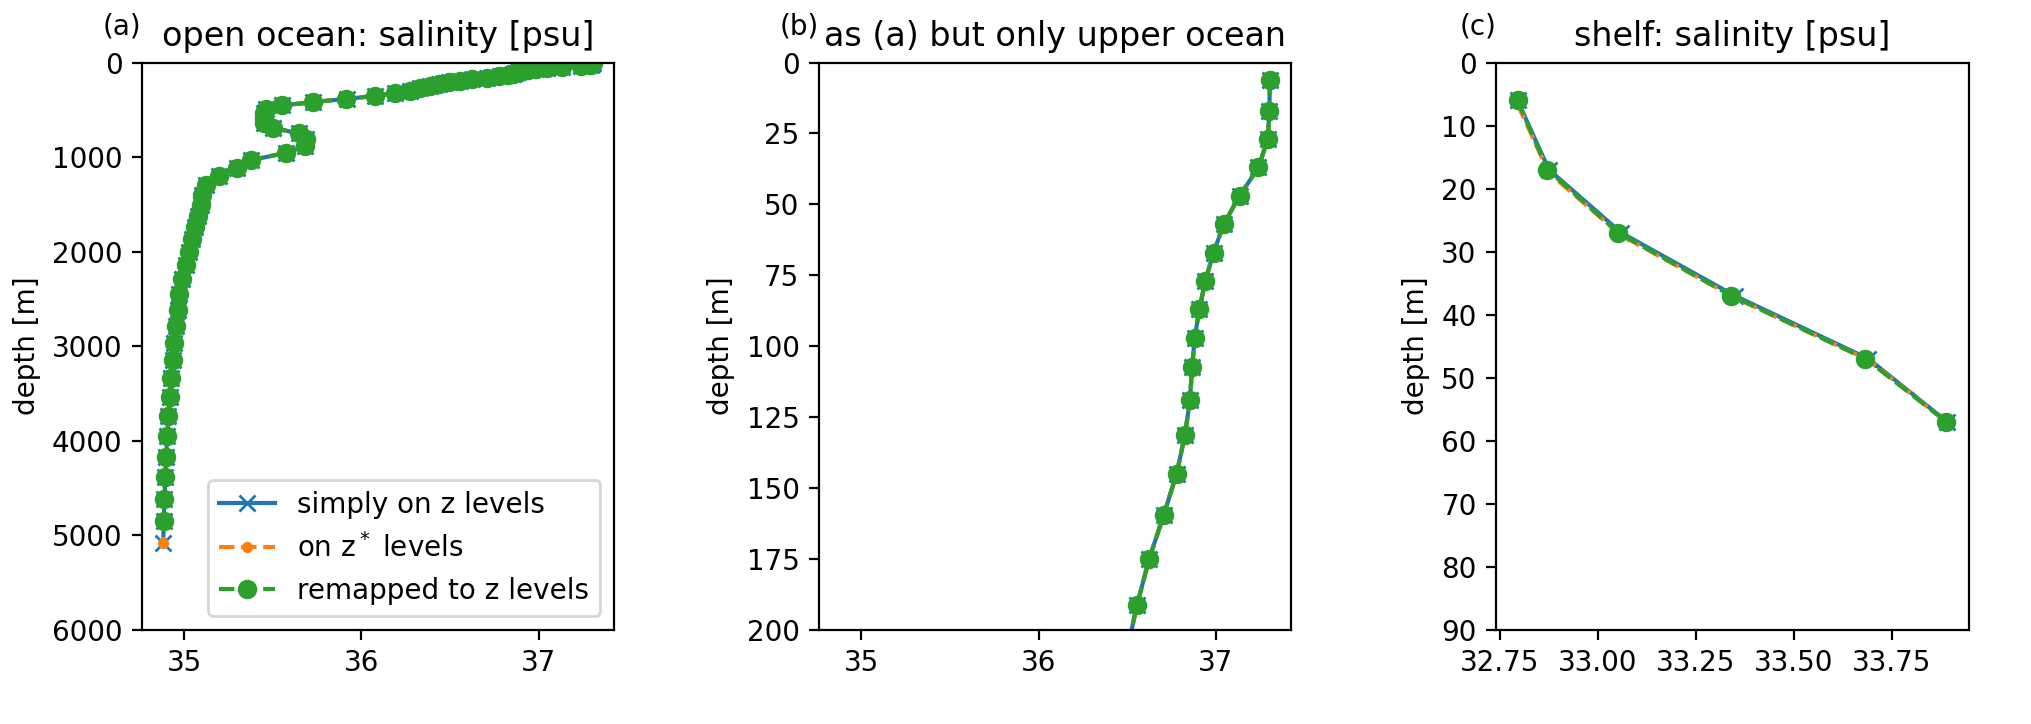

In [99]:
hca, hcb = pyic.arrange_axes(3,1, plot_cb=False, asp=1.2, fig_size_fac=1.8,
                           sharex=False, sharey=False,
                           xlabel="", ylabel="depth [m]",
                          )
ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
ax.plot(so[:,ic1], IcD.depthc, marker='x', label='simply on z levels')
ax.plot(so[:,ic1], depthc_star[:,ic1], marker='.', linestyle='--', label='on z$^*$ levels')
ax.plot(sorm[:,ic1], IcD.depthc, marker='o', linestyle='--', label='remapped to z levels')
ax.set_title('open ocean: salinity [psu]')
ax.legend()

ii+=1; ax=hca[ii]; cax=hcb[ii]
ax.plot(so[:,ic1], IcD.depthc, marker='x')
ax.plot(so[:,ic1], depthc_star[:,ic1], marker='.', linestyle='--')
ax.plot(sorm[:,ic1], IcD.depthc, marker='o', linestyle='--')
ax.set_title('as (a) but only upper ocean')

ii+=1; ax=hca[ii]; cax=hcb[ii]
ax.plot(so[:,ic2], IcD.depthc, marker='x')
ax.plot(so[:,ic2], depthc_star[:,ic2], marker='.', linestyle='--')
ax.plot(sorm[:,ic2], IcD.depthc, marker='o', linestyle='--')
ax.set_title('shelf: salinity [psu]')

for nn, ax in enumerate(hca):
    ax.ticklabel_format(useOffset=False)
    if nn==0:
        ax.set_ylim(6000,0)
    elif nn==1:
        ax.set_ylim(200,0)
    else:
        ax.set_ylim(90,0)
#         ax.set_xlim(dzw[:iz200,ic].min()*0.99,dzw[:iz200,ic].max()*1.01)

In the above plots, the orange and green lines (not the individual points) would lie on top of each other when $z$ is close to $z^*$.

In [100]:
lon, lat, sormi = pyic.interp_to_rectgrid(sorm, fpath_ckdtree)

<IPython.core.display.Javascript object>


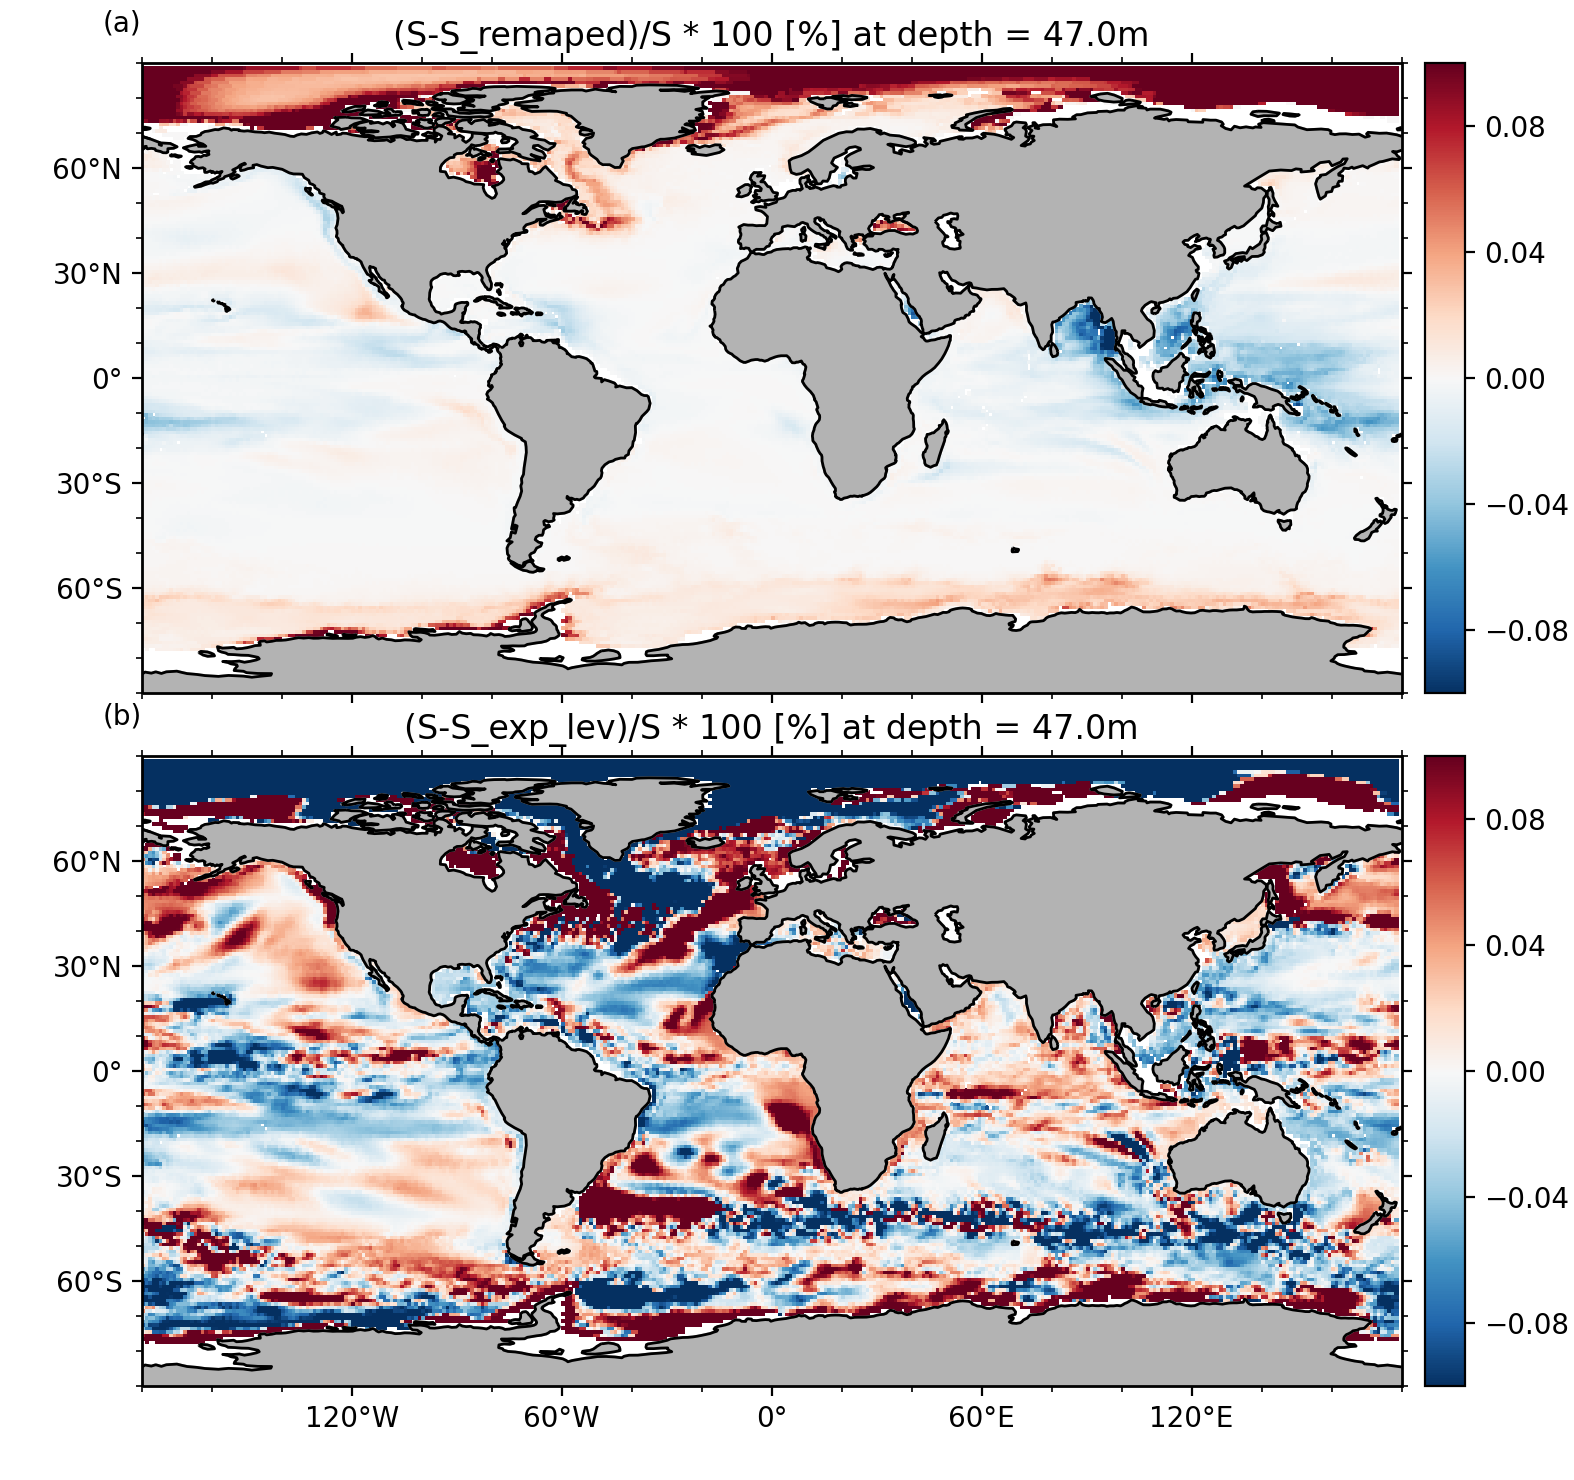

In [101]:
hca, hcb = pyic.arrange_axes(1,2, plot_cb=True, asp=0.5, fig_size_fac=2.,
                           sharex=True, sharey=True,
                           xlabel="", ylabel="",
                           projection=ccrs_proj,
                          )
ii=-1

iz = iz50

ii+=1; ax=hca[ii]; cax=hcb[ii]
hm = pyic.shade(lon, lat, (so1i[iz,:,:]-sormi[iz,:,:])/so1i[iz,:]*100, ax=ax, cax=cax, clim=0.1,
              transform=ccrs_proj)
ax.set_title(f'(S-S_remaped)/S * 100 [%] at depth = {IcD.depthc[iz]}m')

ii+=1; ax=hca[ii]; cax=hcb[ii]
hm = pyic.shade(lon, lat, (so1i[iz,:,:]-so2i[iz,:,:])/so1i[iz,:]*100, ax=ax, cax=cax, clim=0.1,
              transform=ccrs_proj)
ax.set_title(f'(S-S_exp_lev)/S * 100 [%] at depth = {IcD.depthc[iz]}m')


for ax in hca:
    pyic.plot_settings(ax, template='global')

<IPython.core.display.Javascript object>


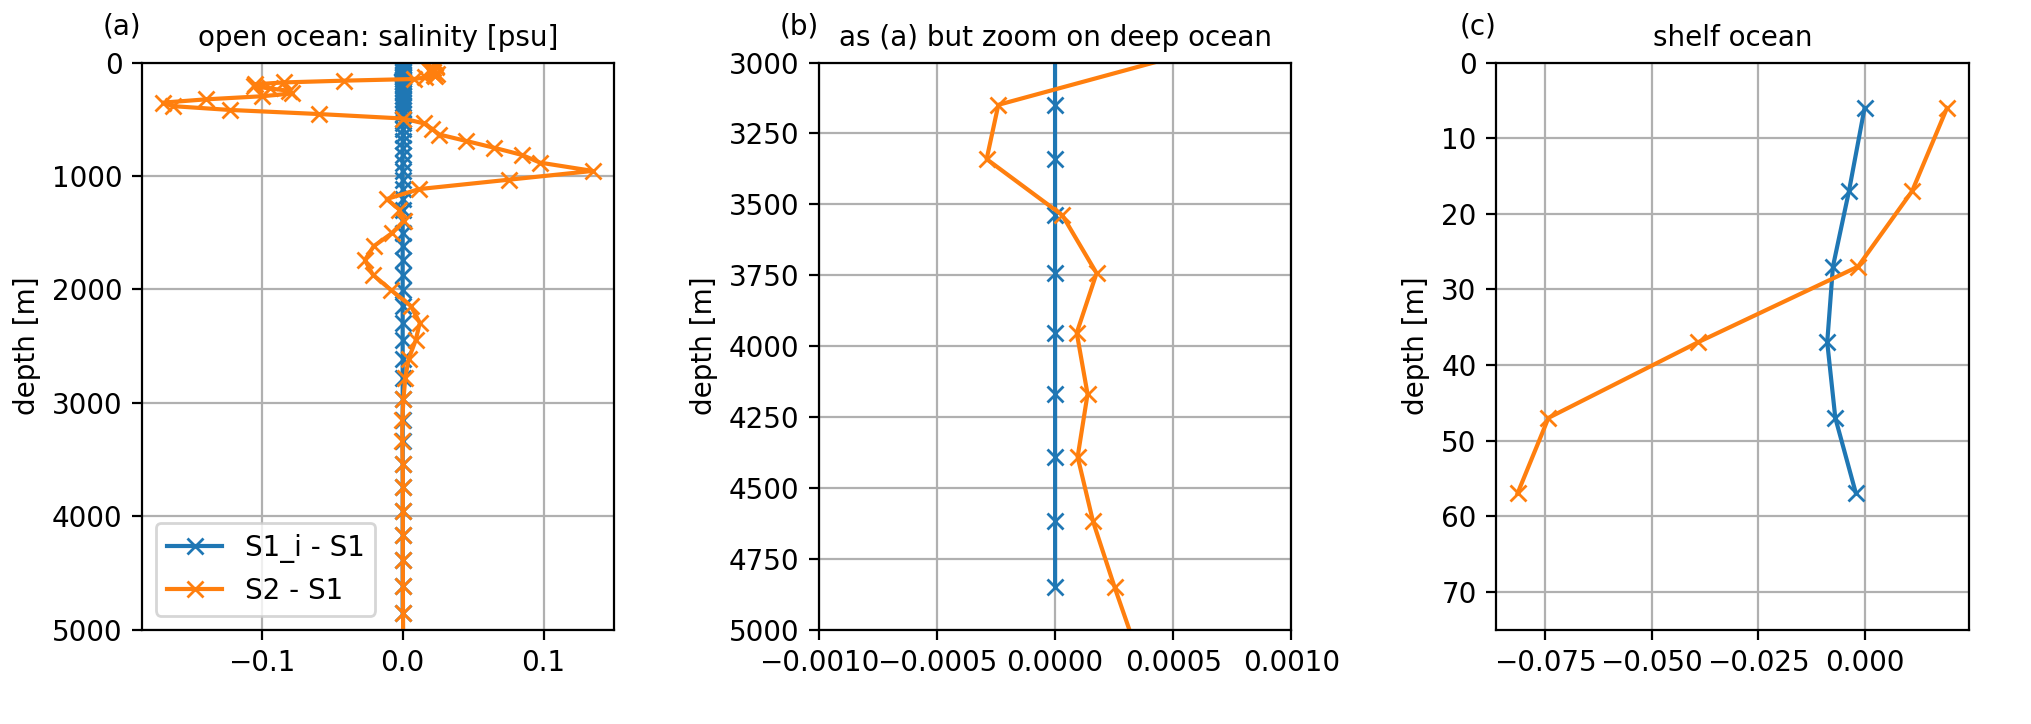

In [102]:
hca, hcb = pyic.arrange_axes(3,1, plot_cb=False, asp=1.2, fig_size_fac=1.8,
                           sharex=False, sharey=False,
                           xlabel="", ylabel="depth [m]",
                          )
ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
ax.plot(sorm[:,ic1]-so1[:,ic1], IcD.depthc, marker='x', label='S1_i - S1')
ax.plot(so2[:,ic1] -so1[:,ic1], IcD.depthc, marker='x', label='S2 - S1')
ax.set_title('open ocean: salinity [psu]', fontsize=10)
ax.legend()
ax.set_ylim(5000,0)

ii+=1; ax=hca[ii]; cax=hcb[ii]
ax.plot(sorm[:,ic1]-so1[:,ic1], IcD.depthc, marker='x', label='S1_i - S1')
ax.plot(so2[:,ic1] -so1[:,ic1], IcD.depthc, marker='x', label='S2 - S1')
ax.set_title('as (a) but zoom on deep ocean', fontsize=10)
ax.set_ylim(5000,3000)
ax.set_xlim(np.array([-1,1])*1e-3)

ii+=1; ax=hca[ii]; cax=hcb[ii]
ax.plot(sorm[:,ic2]-so1[:,ic2], IcD.depthc, marker='x', label='S1_i - S1')
ax.plot(so2[:,ic2] -so1[:,ic2], IcD.depthc, marker='x', label='S2 - S1')
ax.set_title('shelf ocean', fontsize=10)
ax.set_ylim(75,0)

for ax in hca:
    ax.grid(True)